In [7]:
import polars as pl
import matplotlib.pyplot as plt
df = pl.read_csv('cinema.csv')
df.head(3)

cinema_id,SNS1,SNS2,actor,original,sales
i64,i64,i64,f64,i64,i64
1375,291,1044,8808.994029,0,9731
1000,363,568,10290.70937,1,10210
1390,158,431,6340.388534,1,8227


In [3]:
df.null_count()

cinema_id,SNS1,SNS2,actor,original,sales
u32,u32,u32,u32,u32,u32
0,1,0,1,0,0


In [5]:
df2 = df.fill_null(strategy='mean')

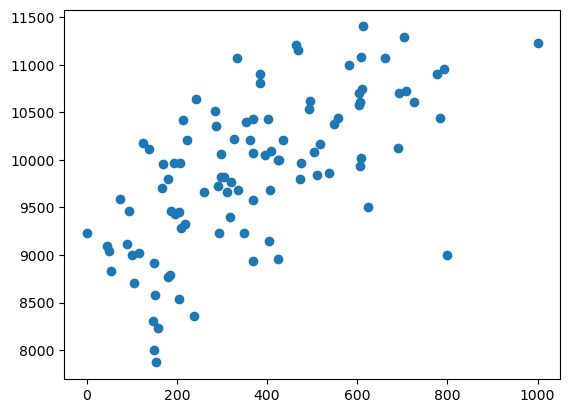

In [9]:
plt.scatter(df2.get_column('SNS1'), df2.get_column('sales'))

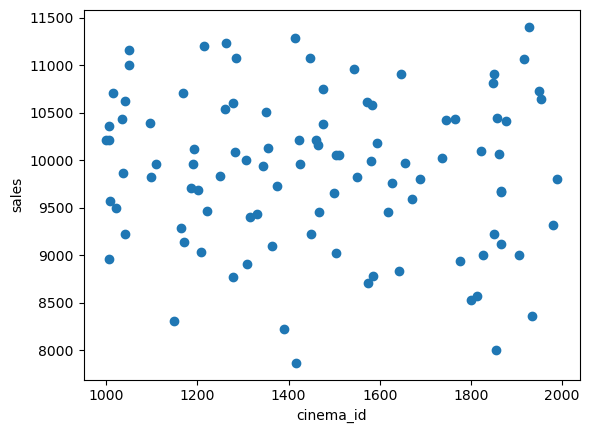

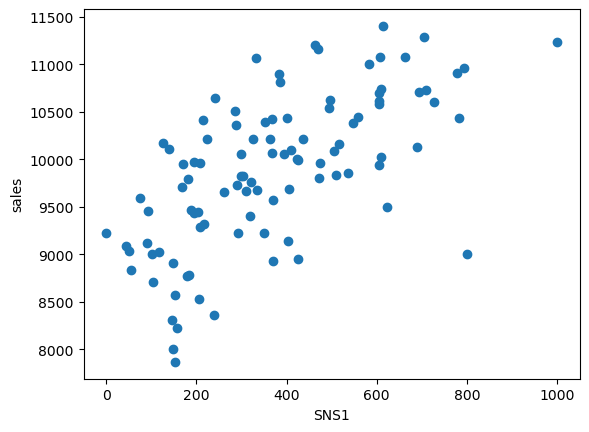

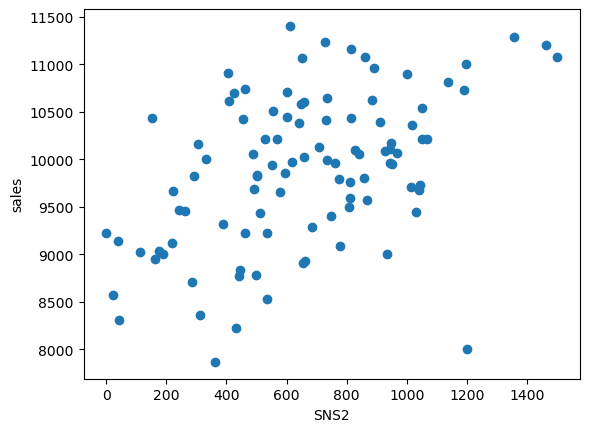

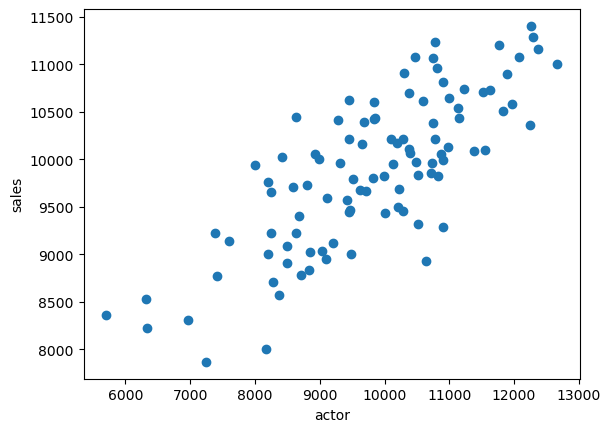

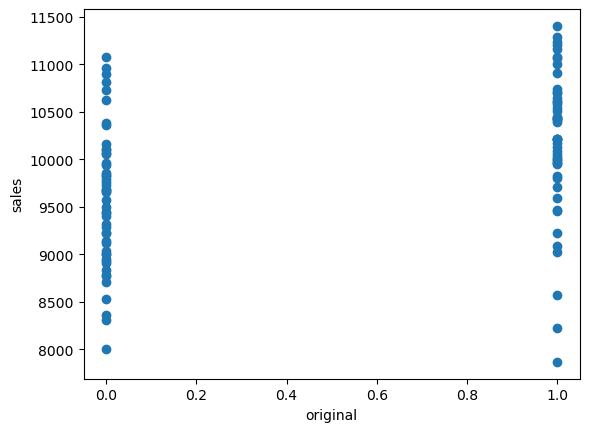

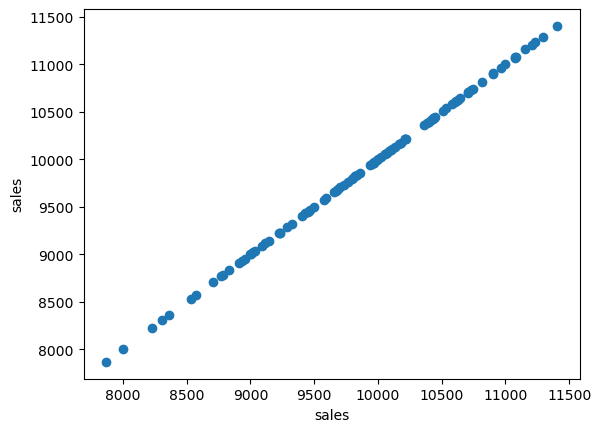

In [19]:
for col in df2.columns:
    plt.scatter(df2.get_column(col), df2.get_column('sales'))
    plt.xlabel(col)
    plt.ylabel("sales")
    plt.show()

In [91]:
no = df2.with_row_index().filter(
    (pl.col('SNS2') > 1000) & (pl.col('sales') < 8500)
).select('index')[0,0]

In [97]:
df3 = df2.with_row_index().filter(
    pl.col('index') != no
).select(
    pl.all().exclude('index')
)

In [103]:
df3[2, 'SNS1']

158

In [147]:
df3['SNS1':'original']

SNS1,SNS2,actor,original
i64,i64,f64,i64
291,1044,8808.994029,0
363,568,10290.70937,1
158,431,6340.388534,1
261,578,8250.485081,0
209,683,10908.53955,0
…,…,…,…
494,1050,11137.48281,1
505,928,11376.03854,1
368,966,10393.25248,0


In [131]:
df.with_columns(df.sum_horizontal().alias('total'))

cinema_id,SNS1,SNS2,actor,original,sales,total
i64,i64,i64,f64,i64,i64,f64
1375,291,1044,8808.994029,0,9731,21249.994029
1000,363,568,10290.70937,1,10210,22432.70937
1390,158,431,6340.388534,1,8227,16547.388534
1499,261,578,8250.485081,0,9658,20246.485081
1164,209,683,10908.53955,0,9286,22250.53955
…,…,…,…,…,…,…
1260,494,1050,11137.48281,1,10537,24479.48281
1283,505,928,11376.03854,1,10084,24177.03854
1861,368,966,10393.25248,0,10069,23657.25248


In [143]:
df.columns[df.columns.index("SNS1"):]

['SNS1', 'SNS2', 'actor', 'original', 'sales']